In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.neighbors import KNeighborsClassifier

In [312]:
image_folder="E:\Facial_Expression_Dataset"
os.listdir(image_folder)

['Angry', 'Happy', 'Sad', 'Surprise']

In [313]:
angry_image=os.listdir(image_folder)[0]
angry_image

'Angry'

In [314]:
demo_image_path = os.path.join(image_folder, angry_image, os.listdir(os.path.join(image_folder, angry_image))[0])
demo_image_path

'E:\\Facial_Expression_Dataset\\Angry\\angry (1).jpeg'

In [315]:
angry_image_files=os.listdir(os.path.join(image_folder,angry_image))
angry_image_files

['angry (1).jpeg',
 'angry (1).jpg',
 'angry (1).png',
 'angry (10).jpg',
 'angry (10).png',
 'angry (100).jpg',
 'angry (100).png',
 'angry (101).JPG',
 'angry (101).png',
 'angry (102).jpg',
 'angry (102).png',
 'angry (103).jpg',
 'angry (103).png',
 'angry (104).jpg',
 'angry (104).png',
 'angry (105).jpg',
 'angry (105).png',
 'angry (106).jpg',
 'angry (106).png',
 'angry (107).jpg',
 'angry (107).png',
 'angry (108).jpg',
 'angry (108).png',
 'angry (109).jpg',
 'angry (109).png',
 'angry (11).jpg',
 'angry (11).png',
 'angry (110).jpg',
 'angry (110).png',
 'angry (111).jpg',
 'angry (111).png',
 'angry (112).jpg',
 'angry (112).png',
 'angry (113).JPG',
 'angry (113).png',
 'angry (114).jpg',
 'angry (114).png',
 'angry (115).jpg',
 'angry (115).png',
 'angry (116).JPG',
 'angry (116).png',
 'angry (117).jpg',
 'angry (117).png',
 'angry (118).jpg',
 'angry (118).png',
 'angry (119).jpg',
 'angry (119).png',
 'angry (12).jpg',
 'angry (12).png',
 'angry (120).jpg',
 'angry (12

(266, 266, 3)
(180, 180)


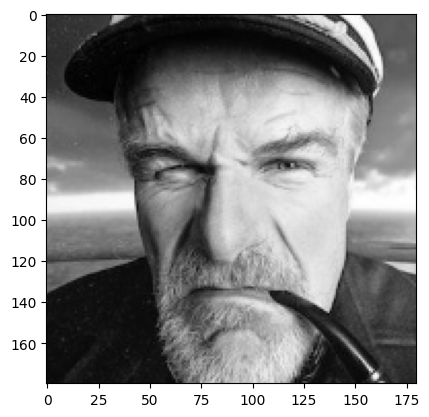

In [316]:
demo_image=cv2.imread(demo_image_path)
print(demo_image.shape)

def is_grayscale(image):
    if len(image.shape) == 3 and image.shape[2] == 3:
        b, g, r = cv2.split(image)
        return np.array_equal(b, g) and np.array_equal(b, r)
    return True

def preprocess_image(image_path):
    # print(f"Processing image : {image_path} ")
    demo_image=cv2.imread(demo_image_path)
    if not is_grayscale(demo_image):
        demo_image = cv2.cvtColor(demo_image, cv2.COLOR_BGR2GRAY)
    demo_image=cv2.resize(demo_image,(180,180))
    demo_image=demo_image / 255.0
    return demo_image
demo_image=preprocess_image(demo_image_path)
print(demo_image.shape)
plt.imshow(demo_image,cmap='gray')

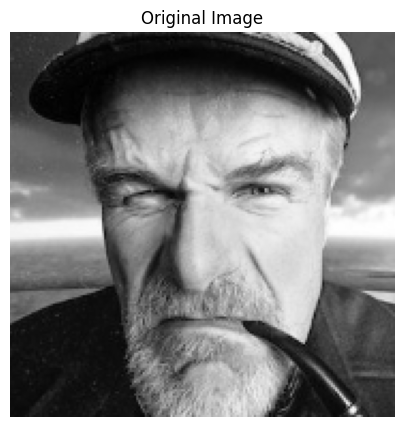

In [317]:
from skimage.feature import hog
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

def extract_hog_features(image): 
    # Convert to grayscale only if it has 3 channels
    if len(image.shape) == 3 and image.shape[2] == 3:
        image = rgb2gray(image)  # Convert only if needed

    features = hog(image, pixels_per_cell=(2, 2), 
                   cells_per_block=(2, 2), orientations=8)
    return features

hog_features = extract_hog_features(demo_image)

# Displaying the original image
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(demo_image, cmap="gray")
ax.set_title("Original Image")
plt.axis('off')
plt.show()


In [318]:
catagories=os.listdir(image_folder)
catagories

['Angry', 'Happy', 'Sad', 'Surprise']

In [319]:
M=[]
Y=[]

In [320]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

In [321]:
batch_size = 100

# Initialize incremental learning classifier
clf = SGDClassifier()  # you can tweak hyperparams
label_encoder = LabelEncoder()

In [322]:
demo=os.path.join(os.path.join(image_folder,catagories[0]),angry_image_files[0])
demo

'E:\\Facial_Expression_Dataset\\Angry\\angry (1).jpeg'

In [323]:
for catagory in catagories:
    folder_path=os.path.join(image_folder,catagory)
    image_files=os.listdir(folder_path)
    print(f"Listing images of {catagory} Folder")
    print(f"Total files found: {len(image_files)}")    
    print(f"Current Y value: {catagory}")    

    for file in image_files:
        # image=preprocess_image(file)
        # feature_map=extract_hog_features(image)
        file_path=os.path.join(os.path.join(image_folder,catagory),file)
        M.append(file_path)
        Y.append(catagory)

Listing images of Angry Folder
Total files found: 1312
Current Y value: Angry
Listing images of Happy Folder
Total files found: 3740
Current Y value: Happy
Listing images of Sad Folder
Total files found: 3934
Current Y value: Sad
Listing images of Surprise Folder
Total files found: 1234
Current Y value: Surprise


In [324]:
print(M[:5])

['E:\\Facial_Expression_Dataset\\Angry\\angry (1).jpeg', 'E:\\Facial_Expression_Dataset\\Angry\\angry (1).jpg', 'E:\\Facial_Expression_Dataset\\Angry\\angry (1).png', 'E:\\Facial_Expression_Dataset\\Angry\\angry (10).jpg', 'E:\\Facial_Expression_Dataset\\Angry\\angry (10).png']


In [325]:
print(len(M))

10220


In [326]:
print(Y[:5])

['Angry', 'Angry', 'Angry', 'Angry', 'Angry']


In [327]:
labels = label_encoder.fit_transform(Y)

In [328]:
print(labels[:5])

[0 0 0 0 0]


In [329]:
label_encoder.inverse_transform([0])

array(['Angry'], dtype='<U8')

In [330]:
M, labels = shuffle(M, labels, random_state=42)

In [331]:
labels[:5]

array([2, 1, 0, 0, 2], dtype=int64)

In [332]:
cnt=0
for i in range(0, len(M), batch_size):
    batch_paths = M[i:i+batch_size]
    batch_labels = labels[i:i+batch_size]
    
    features = []
    for path in batch_paths:

        image = preprocess_image(path)
        if image is None:
            print(f"Warning: Couldn't read image {path}")
            cnt+=1
            continue  # skip this file
        
        hog_feature = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
        features.append(hog_feature)
    
    features = np.array(features)
    batch_labels = np.array(batch_labels)
    # Convert to numpy only if features are non-empty
    if features.size == 0:  
        print(f"Skipping batch {i//batch_size + 1}: No valid images")
        continue  # Skip this batch

    features = np.array(features)
    batch_labels = np.array(batch_labels)

    if i == 0:
        clf.partial_fit(features, batch_labels, classes=np.unique(labels))
    else:
        clf.partial_fit(features, batch_labels)

print(f"Training finished successfully with missing image = {cnt}! ")

Training finished successfully with missing image = 0! 


In [333]:
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image):
    # Ensure grayscale
    if len(image.shape) == 3 and image.shape[2] == 3:
        image = rgb2gray(image)

    # Match exact training HOG setup
    features = hog(image,
                   orientations=9,
                   pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2),
                   block_norm='L2-Hys',
                   transform_sqrt=True,
                   visualize=False,
                   feature_vector=True)
    return features


In [334]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Could not read image: {image_path}")

    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (180, 180))  # Must match training size
    return image


In [335]:
features = extract_hog_features(image)
print("Feature shape:", features.shape)  # Should be (15876,)


Feature shape: (15876,)


In [348]:
import numpy as np


def predict_image(image_path, clf):
    """Preprocess the image, extract features, and make a prediction."""
    image = preprocess_image(image_path)
    features = extract_hog_features(image)
    features = np.array(features).reshape(1, -1)  # Ensure correct shape
    print("Feature shape:", features.shape)  # Debugging output
    prediction = clf.predict(features)
    return prediction[0]  # Return the predicted class

# Assuming you have loaded the trained model (clf) using joblib
# clf = joblib.load('your_model_path.pkl')  # Replace with the correct path to your model

# Example image path
image_path = r"E:\Facial_Expression_Dataset\Surprise\surprise (38).jpg"

# Predict the image
predicted_label = predict_image(image_path, clf)

# Display the result
print(f"Predicted Class: {label_encoder.inverse_transform([predicted_label])}")


Feature shape: (1, 15876)
Predicted Class: ['Sad']
